In [16]:
import os
import random
import cv2 as cv
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
import nbformat
from PIL import Image
import math

In [17]:
TRAIN_DIR = '/content/drive/MyDrive/Assignment CVPR/Animals'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['Tiger', 'Jaguar', 'Leopard', 'Cheetah', 'Lion']


In [18]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    class_num = CATEGORIES.index(c)
    print(path, class_num)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path, img))
        img_arr = cv.resize(img_arr, (64, 64), interpolation=cv.INTER_AREA)

        TRAIN_DATA.append([img_arr, class_num])
print()
print(len(TRAIN_DATA))

/content/drive/MyDrive/Assignment CVPR/Animals/Tiger 0


100%|██████████| 39/39 [00:00<00:00, 79.61it/s]


/content/drive/MyDrive/Assignment CVPR/Animals/Jaguar 1


100%|██████████| 30/30 [00:00<00:00, 84.28it/s]


/content/drive/MyDrive/Assignment CVPR/Animals/Leopard 2


100%|██████████| 31/31 [00:00<00:00, 82.54it/s]


/content/drive/MyDrive/Assignment CVPR/Animals/Cheetah 3


100%|██████████| 38/38 [00:00<00:00, 81.65it/s]


/content/drive/MyDrive/Assignment CVPR/Animals/Lion 4


100%|██████████| 32/32 [00:00<00:00, 86.29it/s]


170


Text(0.5, 0, 'Tiger')

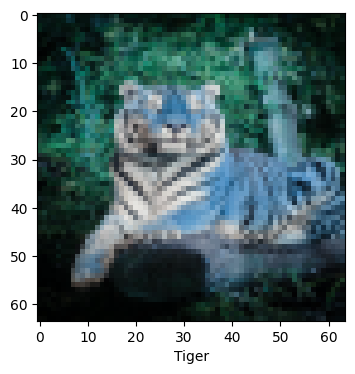

In [19]:
image = TRAIN_DATA[0][0]
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.xlabel(CATEGORIES[TRAIN_DATA[0][1]])

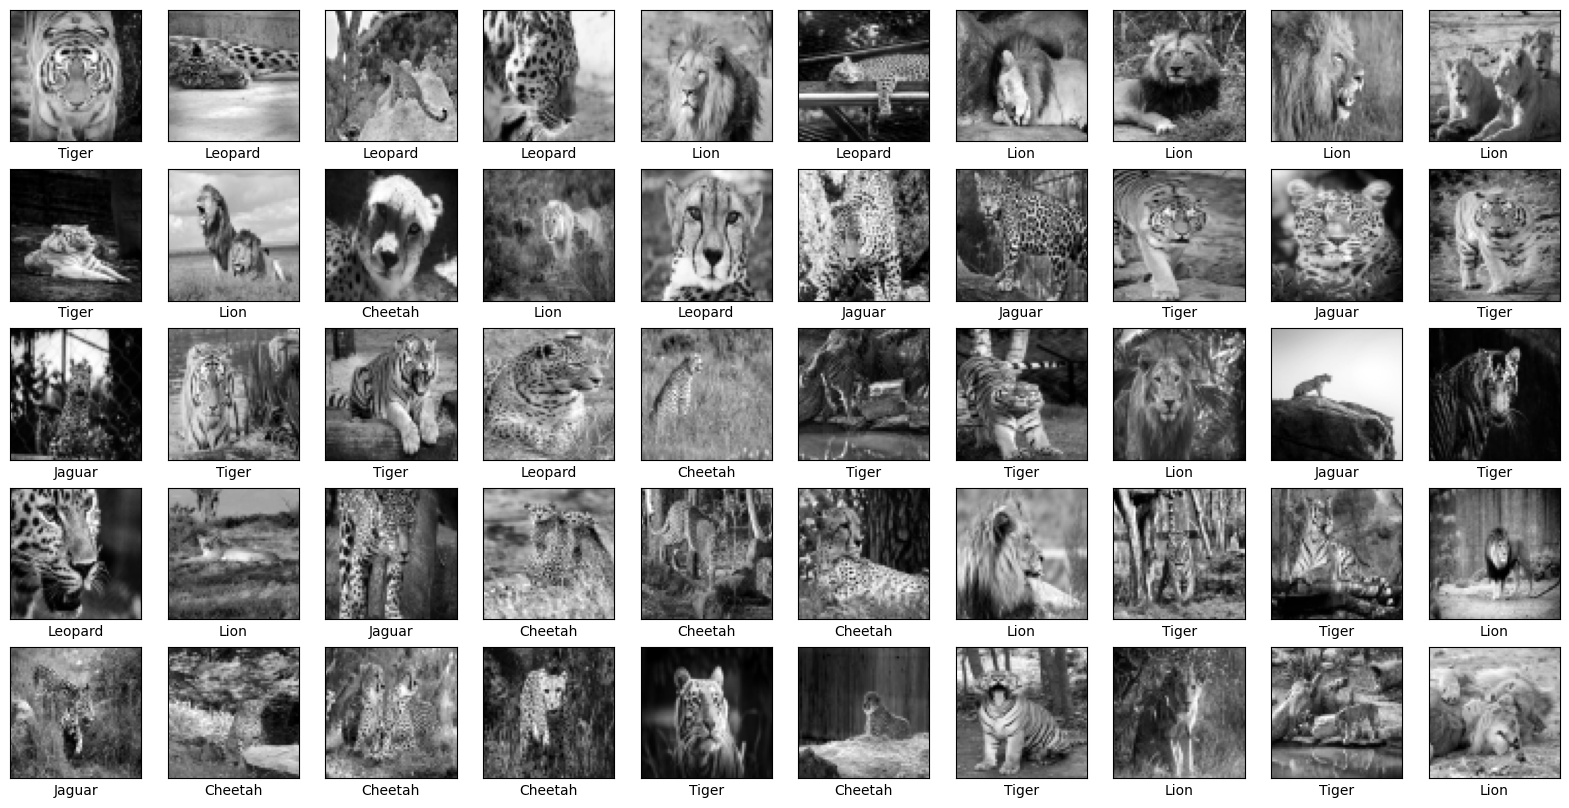

In [20]:
random.shuffle(TRAIN_DATA)

plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5, 10, i+1)
    image = TRAIN_DATA[i][0]
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(image_gray, cmap="gray")
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    plt.axis()
    if i == 50:
        break
plt.show()

In [21]:
f1 = TRAIN_DATA[0:34]
f2 = TRAIN_DATA[34:68]
f3 = TRAIN_DATA[68:102]
f4 = TRAIN_DATA[102:136]
f5 = TRAIN_DATA[136:170]

In [22]:
def by_l2_dist(list):
    return list[2]["l2"]

In [23]:
top_filter = 30
def distance_calc(train_fold, valid_fold):
    l2_result = []
    for valid in tqdm(valid_fold):
        temp_dist_list = []
        for train in train_fold:
            l2_dist = np.sqrt(np.sum((valid[0] - train[0])**2))
            temp_dist_list.append([valid[1],  train[1], {"l2": l2_dist}])
        temp_dist_list.sort(key=by_l2_dist)
        l2_result.append(temp_dist_list[:top_filter])
    return [l2_result]

In [24]:
k_range = 30
def cal_accuracy(dist_result, dist_term):
    k_accuracies = []
    for k in range(1, k_range+1):
        img_accuracy = 0
        for valid_img in dist_result:
            nn = valid_img[:k]
            same_class = [n for n in nn if n[0] == n[1]]
            same_class_len = len(same_class)
            if k % 2 != 0:
                if ((k-1) / 2) < same_class_len:
                    img_accuracy += 1
            else:
                diff_class = [n for n in nn if n[0] != n[1]]
                if same_class_len > len(diff_class):
                    img_accuracy += 1
                elif same_class_len == len(diff_class):
                    same_class_dist = sum([n[2][dist_term] for n in same_class])
                    diff_class_dist = sum([n[2][dist_term] for n in diff_class])
                    if same_class_dist > diff_class_dist:
                        img_accuracy += 1
        k_accuracies.append(img_accuracy/len(dist_result))
    return k_accuracies

In [25]:
dist_by_fold = []

for i in range(5):
    if i == 0:
        train = f2 + f3 + f4 + f5
        validation = f1
    elif i == 1:
        train = f1 + f3 + f4 + f5
        validation = f2
    elif i == 2:
        train = f1 + f2 + f4 + f5
        validation = f3
    elif i == 3:
        train = f1 + f2 + f3 + f5
        validation = f4
    elif i == 4:
        train = f1 + f2 + f3 + f4
        validation = f5

    dist_by_fold.append(distance_calc(train, validation))

print()
len(dist_by_fold[0][0])

100%|██████████| 34/34 [00:00<00:00, 246.54it/s]

34

In [26]:
accuracies = []

for result in dist_by_fold:
    l2_accuracy = cal_accuracy(result[0], "l2")
    accuracies.append([l2_accuracy])

print(accuracies)

[[[0.29411764705882354, 0.29411764705882354, 0.08823529411764706, 0.14705882352941177, 0.08823529411764706, 0.08823529411764706, 0.08823529411764706, 0.029411764705882353, 0.058823529411764705, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.0, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.35294117647058826, 0.23529411764705882, 0.17647058823529413, 0.14705882352941177, 0.11764705882352941, 0.029411764705882353, 0.058823529411764705, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[0.17647058823529413, 0.3235294117647059, 0.176470588235

For L2 Distance:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.2941, 0.2941, 0.0882, 0.1471, 0.0882, 0.0882, 0.0882, 0.0294, 0.0588, 0.0294, 0.0294, 0.0294, 0.0, 0.0294, 0.0294, 0.0294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max accuracy:  0.2941
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.3529, 0.2353, 0.1765, 0.1471, 0.1176, 0.0294, 0.0588, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0294, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max accuracy:  0.3529
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[0.1765, 0.3235, 0.1765, 0.1471, 0.1471, 0.2059, 0.1176, 0.1471, 0.1471, 0.1176, 0.0882, 0.0882, 0.0588, 0.0588, 0.0294, 0.0294, 0.0294, 0.0588, 0.0588, 0.0588, 0.0, 0.0294, 0.0, 0.0, 0.0

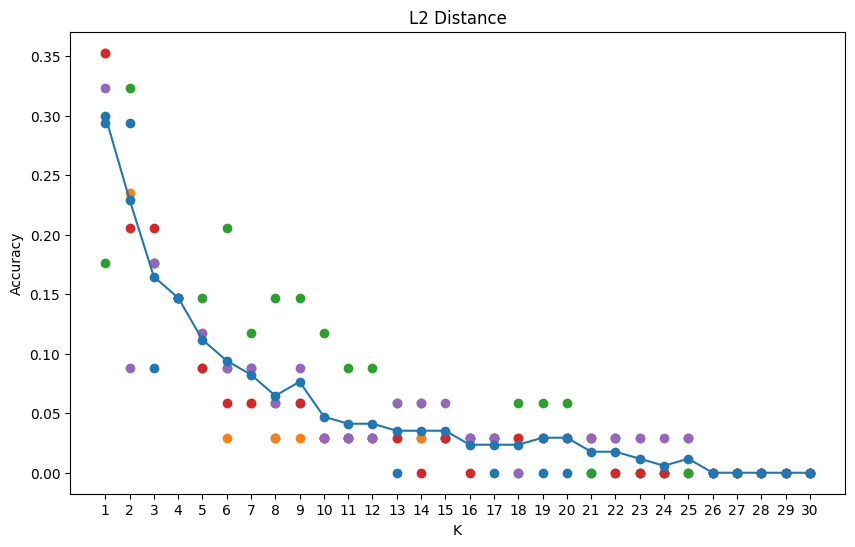

In [27]:
print("For L2 Distance:")
x_list = list(range(1, k_range+1))
plt.figure(figsize=(10, 6))

for fold in accuracies:
    y_list = fold[0]
    print(x_list)
    numbers = y_list
    rounded_numbers = [round(num, 4) for num in numbers]
    print(rounded_numbers)
    print("Max accuracy: ", max(rounded_numbers))
    plt.scatter(x_list, y_list)

arr = []
for i in range(k_range):
    arr.append([fold[0][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]

plt.errorbar(x_list, trend, fmt='-o')
plt.title('L2 Distance')
plt.xticks(x_list)
plt.grid(False)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()